# Reconstruction

We can test various configurations of the reconstruction to try to find the best option. We can do this using a hyper-parameter search strategy which chooses the configuration that reduces a given error. For this we can could use a reprojection error and a grid search strategy.

For this test, and due to time constraints I will select the best one visually.

100%|██████████| 195/195 [00:31<00:00,  6.19it/s]


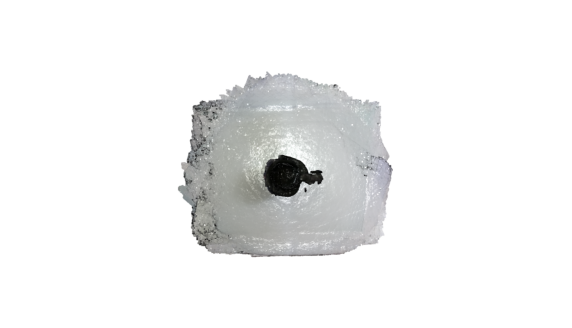

In [9]:
%cd .. -- So we can move the notebooks folder to the root of the project
import open3d as o3d
import numpy as np
from reconstruction.dataset import Dataset
from reconstruction.reconstructor import ClassicReconstructor , ReconstructorConfig
import reconstruction.utils.visualization as vis

Reconstructor = ClassicReconstructor

dataset = Dataset.read("data/3d-scans-cap-black-glossy-ha-2019-02-27T16_06_29")
dataset.frames = dataset.frames
device = "CUDA:0" if o3d.core.cuda.is_available() else "CPU:0"

config = ReconstructorConfig(
    device=device, 
    camera_intrinsic=np.array([[613.688, 0.0, 323.035], 
                            [0.0, 614.261, 242.229], 
                            [0.0, 0.0, 1.0]]), 
    voxel_size=0.001, 
    block_resolution=16, 
    block_count=10000,
    depth_scale=1000.0,
    depth_min=0.01,
    depth_max=0.5,
    debug=True
)

reconstructor = Reconstructor(config)
volume = reconstructor.reconstruct(dataset)
mesh = volume.extract_point_cloud()
vis.visualize_geometry([mesh.to_legacy()])
o3d.visualization.draw_geometries([mesh.to_legacy()])
